In [2]:
library("plyr")
library(descr)
library("partykit")
library("tidyverse")
data <- read.csv(file="../input/Career.csv")

Loading required package: grid
Loading required package: libcoin
Loading required package: mvtnorm
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0       v purrr   0.3.0  
v tibble  2.0.1       v dplyr   0.8.0.1
v tidyr   0.8.2       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::lag()
x dplyr::mutate()    masks plyr::mutate()
x dplyr::rename()    masks plyr::rename()
x dplyr::summarise() masks plyr::summarise()
x dplyr::summarize() masks plyr::summarize()


In [3]:
head(data)

college,year,stream,cgpa,X12th,X10th,career,parents,income,locality,state
IIITs,2nd,"Computer science and engineering,",<6,Private School,Private School,Higher study,Public Sector,> 10 lakhs,Urban,Rajasthan
Government,4th,"Chemical engineering,",6-8,Private School,Private School,Public Sector Job,Public Sector,3-6 lakhs,Urban,Haryana
NITs,4th,"Civil engineering,",6-8,Private School,Private School,Public Sector Job,Self-Employed,< 3 lakhs,Rural,Rajasthan
Government,4th,"Electronics and communication engineering,",6-8,Private School,Private School,Entrepreneurship,Public Sector,> 10 lakhs,Urban,Delhi
Private,3rd,"Information technology,",6-8,Private School,Private School,Private Sector job,Business,3-6 lakhs,Urban,Uttar Pradesh
IIITs,1st,"Computer science and engineering,",>8,Private School,Private School,Private Sector job,Self-Employed,3-6 lakhs,Urban,Uttar Pradesh


In [4]:
summary(data)

       college     year                                            stream   
 Government: 48   1st:104   Computer science and engineering,         :123  
 IIITs     :133   2nd: 56   Electronics and communication engineering,: 89  
 IITs      :  6   3rd: 81   Mechanical engineering,                   : 33  
 NITs      :109   4th: 97   Electrical engineering,                   : 25  
 Private   : 42             Civil engineering,                        : 17  
                            Information technology,                   : 16  
                            (Other)                                   : 35  
  cgpa                X12th                X10th                    career   
 <6 : 25   Private School:237   Private School:243   Defence           : 18  
 >8 :128   Public School :101   Public School : 95   Entrepreneurship  : 36  
 6-8:185                                             Family business   :  2  
                                                     Higher study      :

In [5]:
str(data)

'data.frame':	338 obs. of  11 variables:
 $ college : Factor w/ 5 levels "Government","IIITs",..: 2 1 4 1 5 2 2 2 2 2 ...
 $ year    : Factor w/ 4 levels "1st","2nd","3rd",..: 2 4 4 4 3 1 2 2 3 1 ...
 $ stream  : Factor w/ 13 levels "Biological engineering",..: 5 2 3 8 9 5 8 5 8 8 ...
 $ cgpa    : Factor w/ 3 levels "<6",">8","6-8": 1 3 3 3 3 2 1 3 3 1 ...
 $ X12th   : Factor w/ 2 levels "Private School",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ X10th   : Factor w/ 2 levels "Private School",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ career  : Factor w/ 6 levels "Defence","Entrepreneurship",..: 4 6 6 2 5 5 6 5 5 2 ...
 $ parents : Factor w/ 5 levels "Business","Defence",..: 4 4 5 4 1 5 5 4 3 1 ...
 $ income  : Factor w/ 4 levels "< 3 lakhs","> 10 lakhs",..: 2 3 1 2 3 3 1 4 1 2 ...
 $ locality: Factor w/ 2 levels "Rural","Urban": 2 2 1 2 2 2 1 2 2 2 ...
 $ state   : Factor w/ 19 levels "Abroad","Andhra Pradesh",..: 15 6 15 4 17 17 3 17 15 17 ...


In [6]:
data$stream <- revalue(data$stream,c(
    'Computer science and engineering,'='COMP','Electronics and communication engineering,'='ELEC',
    'Information technology,'='COMP','Mechanical engineering,'='MECH','Civil engineering,'='MECH',
    'Mechatronics engineering,'='MECH','Electrical and electronics and engineering'='ELEC',
    'Environmental engineering,'='CHEM','Architecture and construction engineering,'='MECH',
    'Highway engineering,'='MECH','Computer engineering,'='COMP','Marine engineering,'='CHEM',
    'Automobile engineering,'='MECH','Aeronautical engineering,'='MECH','Aerospace engineering,'='MECH',
    'Telecommunication engineering,'='ELEC','Electronics and communication engineering,'='ELEC',
    'Agricultural engineering,'='CHEM','Production and industrial engineering,'='MECH',
    'Chemical engineering,'='CHEM','Electrical engineering,'='ELEC','Instrumental engineering,'='ELEC',
    'Mining engineering,'='CHEM','Architectural'='MECH','Biological Science'='CHEM','Bio-Medical'='CHEM',
    'Biological engineering'='CHEM','Nuclear engineering'='CHEM','Systems engineering'='COMP','Others'=-1
))

The following `from` values were not present in `x`: Mechatronics engineering,, Environmental engineering,, Architecture and construction engineering,, Highway engineering,, Marine engineering,, Automobile engineering,, Aeronautical engineering,, Aerospace engineering,, Telecommunication engineering,, Electronics and communication engineering,, Agricultural engineering,, Instrumental engineering,, Architectural, Biological Science, Bio-Medical, Nuclear engineering, Systems engineering


In [7]:
data$state <- revalue(data$state,c(
    'Rajasthan'='W','Delhi'='N','Haryana'='N','Punjab'='N','Chandigarh'='N','Andhra Pradesh'='S',
    'Telangana'='S','Arunachal Pradesh'='E','Assam'='E','Bihar'='C','Chhattisgarh'='C','Goa'='S',
    'Gujarat'='W','Himachal Pradesh'='N','Jammu and Kashmir'='N','Jharkhand'='C','Karnataka'='S',
    'Kerala'='S','Madhya Pradesh'='C','Maharashtra'='C','Manipur'='E','Meghalaya'='E','Mizoram'='E',
    'Nagaland'='E','Odisha'='E','Sikkim'='E','Tamil Nadu'='S','Tripura'='E','Uttar Pradesh'='N',
    'Uttarakhand'='N','West Bengal'='E','Andaman and Nicobar Islands'='S',
    'Dadra and Nagar Haveli'='W','Daman and Diu'='W','Lakshadweep'='S','Pondicherry'='S',
    'Abroad'=-1
))

The following `from` values were not present in `x`: Chandigarh, Arunachal Pradesh, Assam, Chhattisgarh, Goa, Himachal Pradesh, Jammu and Kashmir, Manipur, Meghalaya, Mizoram, Nagaland, Sikkim, Tamil Nadu, Tripura, Andaman and Nicobar Islands, Dadra and Nagar Haveli, Daman and Diu, Pondicherry


In [8]:
data$career <- revalue(data$career,c('Defence'='DEF','Entrepreneurship'='E','Family business'='FB','Higher study'='HS',
                                     'Private Sector job'='PRIVATE','Public Sector Job'='PUBLIC'))
    

In [9]:
data$parents<- revalue(data$parents,c('Defence'='DEF','Business'='BUS','Private Sector'='PRIVATE',
                                      'Public Sector'='PUBLIC','Self-Employed'='SELF'))

In [10]:
str(data)

'data.frame':	338 obs. of  11 variables:
 $ college : Factor w/ 5 levels "Government","IIITs",..: 2 1 4 1 5 2 2 2 2 2 ...
 $ year    : Factor w/ 4 levels "1st","2nd","3rd",..: 2 4 4 4 3 1 2 2 3 1 ...
 $ stream  : Factor w/ 5 levels "CHEM","MECH",..: 3 1 2 4 3 3 4 3 4 4 ...
 $ cgpa    : Factor w/ 3 levels "<6",">8","6-8": 1 3 3 3 3 2 1 3 3 1 ...
 $ X12th   : Factor w/ 2 levels "Private School",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ X10th   : Factor w/ 2 levels "Private School",..: 1 1 1 1 1 1 2 1 1 1 ...
 $ career  : Factor w/ 6 levels "DEF","E","FB",..: 4 6 6 2 5 5 6 5 5 2 ...
 $ parents : Factor w/ 5 levels "BUS","DEF","PRIVATE",..: 4 4 5 4 1 5 5 4 3 1 ...
 $ income  : Factor w/ 4 levels "< 3 lakhs","> 10 lakhs",..: 2 3 1 2 3 3 1 4 1 2 ...
 $ locality: Factor w/ 2 levels "Rural","Urban": 2 2 1 2 2 2 1 2 2 2 ...
 $ state   : Factor w/ 6 levels "-1","S","C","N",..: 5 4 5 4 4 4 3 4 5 4 ...


In [38]:
jpeg("../analysis/college-hist.png")
barplot(table(data$`college`),main="Data distribution of colleges",xlab="College",ylab="Count",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/year-hist.png")
barplot(table(data$`year`),main="Data distribution of years",xlab="Year",ylab="Count",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/stream-hist.png")
barplot(table(data$`stream`),main="Data distribution of streams",xlab="Streams",ylab="Count",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/cgpa-hist.png")
barplot(table(data$`cgpa`),main="Data distribution of cgpa",xlab="CGPA",ylab="Count",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/X12th-hist.png")
barplot(table(data$`X12th`),main="Data distribution of 12th Class",xlab="12th Class",ylab="Count",col=c("#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/X10th-hist.png")
barplot(table(data$`X10th`),main="Data distribution of 10th Class",xlab="10th Class",ylab="Count",col=c("#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/career-hist.png")
barplot(table(data$`career`),main="Data distribution of careers",xlab="Career",ylab="Count",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/parents-hist.png")
barplot(table(data$`parents`),main="Data distribution of parent's job",xlab="Parent's job",ylab="Count",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/income-hist.png")
barplot(table(data$`income`),main="Data distribution of income groups",xlab="Income group",ylab="Count",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/locality-hist.png")
barplot(table(data$`locality`),main="Data distribution of localities",xlab="Locality",ylab="Count",col=c("#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()
jpeg("../analysis/state-hist.png")
barplot(table(data$`state`),main="Data distribution of Zones",xlab="Zone",ylab="Count",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [37]:
jpeg("../analysis/college-mosaic.png")
plot(data$college,data$career,main="Colleges vs Career",xlab="College",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()
jpeg("../analysis/year-mosaic.png")
plot(data$year,data$career,main="Year vs Career",xlab="Year",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()
jpeg("../analysis/stream-mosaic.png")
plot(data$stream,data$career,main="Streams vs Career",xlab="Streams",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()
jpeg("../analysis/cgpa-mosaic.png")
plot(data$cgpa,data$career,main="CGPA vs Career",xlab="CGPA",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()
jpeg("../analysis/X12th-mosaic.png")
plot(data$X12th,data$career,main="12th Class vs Career",xlab="12th Class",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()
jpeg("../analysis/X10th-mosaic.png")
plot(data$X10th,data$career,main="10th Class vs Career",xlab="10th Class",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()
jpeg("../analysis/parents-mosaic.png")
plot(data$parents,data$career,main="Parent's job vs Career",xlab="Parent's job",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()
jpeg("../analysis/income-mosaic.png")
plot(data$income,data$career,main="Income group vs Career",xlab="Income group",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()
jpeg("../analysis/locality-mosaic.png")
plot(data$locality,data$career,main="Locality vs Career",xlab="Locality",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()
jpeg("../analysis/state-mosaic.png")
plot(data$state,data$career,main="Region vs Career",xlab="Region",ylab="Career",col=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF")) 
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [15]:
svg(file = "../analysis/decision_tree.svg")
ct <- ctree(
  career ~ ., 
  data = data,
  control = ctree_control(minsplit=2, minbucket=5, mincriterion=.5))
plot(as.simpleparty(ct))
dev.off()

png 
  2

In [13]:
ct <- ctree(
  career ~ ., 
  data = data,
  control = ctree_control(minsplit=2, minbucket=5, mincriterion=.5))
print(ct)




Model formula:
career ~ college + year + stream + cgpa + X12th + X10th + parents + 
    income + locality + state

Fitted party:
[1] root
|   [2] stream in CHEM, MECH, ELEC, -1
|   |   [3] state in -1, S, N, E
|   |   |   [4] state in -1, S, E: PUBLIC (n = 16, err = 62.5%)
|   |   |   [5] state in N
|   |   |   |   [6] X10th in Private School
|   |   |   |   |   [7] X12th in Private School: PUBLIC (n = 51, err = 47.1%)
|   |   |   |   |   [8] X12th in Public School: PUBLIC (n = 10, err = 50.0%)
|   |   |   |   [9] X10th in Public School: PUBLIC (n = 20, err = 50.0%)
|   |   [10] state in C, W
|   |   |   [11] locality in Rural: PUBLIC (n = 31, err = 22.6%)
|   |   |   [12] locality in Urban: PUBLIC (n = 67, err = 58.2%)
|   [13] stream in COMP
|   |   [14] income < 3 lakhs, 3-6 lakhs
|   |   |   [15] income < 3 lakhs: PRIVATE (n = 30, err = 46.7%)
|   |   |   [16] income in 3-6 lakhs
|   |   |   |   [17] cgpa <6, >8: PRIVATE (n = 19, err = 63.2%)
|   |   |   |   [18] cgpa in 6-8: PRIV

Saving 6.67 x 6.67 in image


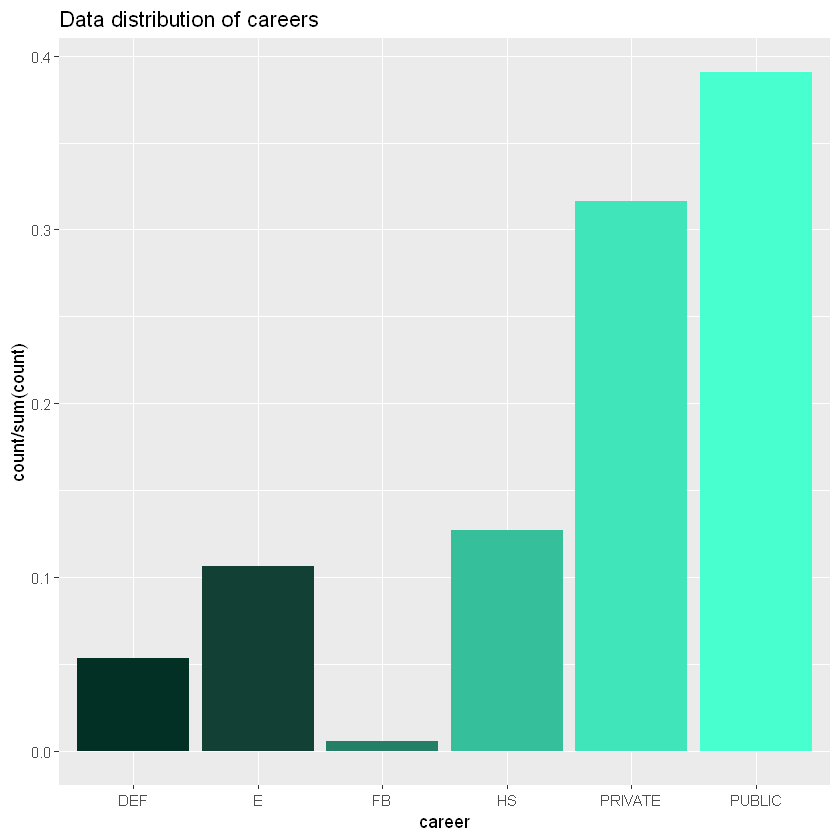

In [40]:
ggplot(data,aes(x=career,fill=career,legend=FALSE))+
geom_bar(aes(y=..count../sum(..count..)))+
scale_fill_manual(values=c("#023024","#124034","#247F67","#36BF9B","#41E5BA","#48FFCF"),guide = FALSE)+
ggtitle("Data distribution of careers")+
ggsave(filename="../analysis/careers.jpg")